In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import glob
%load_ext tensorboard

C:\Users\suhas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\suhas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\suhas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\suhas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
keras.__version__

'2.2.4-tf'

In [3]:
path = glob.glob("C:/Users/suhas/Documents/Mini Project/Leaves/*.jpg")

In [79]:
IMAGE_SIZE = 100
num_classes = 32
epochs = 100

In [5]:
def label(img_name):
    num = int(img_name[-8:-4])
    if num >= 1001 and num <= 1059:
        return 0 #'pubescent bamboo'
    elif num >= 1060 and num <= 1122:
        return 1 #'chinese horse chestnut'
    elif num >= 1552 and num <= 1616:
        return 2 #'anhui barberry'
    elif num >= 1123 and num <= 1194:
        return 3 #'chinese redbud'
    elif num >= 1195 and num <= 1267:
        return 4 #'true indigo'
    elif num >= 1268 and num <= 1323:
        return 5 #'japanese maple'
    elif num >= 1324 and num <= 1385:
        return 6 #'nanmu'
    elif num >= 1386 and num <= 1437:
        return 7 #'castor aralia'
    elif num >= 1497 and num <= 1551:
        return 8 #'chinese cinnamon'
    elif num >= 1438 and num <= 1496:
        return 9 #'goldenrain tree'
    elif num >= 2001 and num <= 2050:
        return 10 #'big-fruited holly'
    elif num >= 2051 and num <= 2113:
        return 11 #'japanese cheesewood'
    elif num >= 2114 and num <= 2165:
        return 12 #'wintersweet'
    elif num >= 2166 and num <= 2230:
        return 13 #'camphor tree'
    elif num >= 2231 and num <= 2290:
        return 14 #'japan arrowwood'
    elif num >= 2291 and num <= 2346:
        return 15 #'sweet osmanthus'
    elif num >= 2347 and num <= 2423:
        return 16 #'deodar'
    elif num >= 2424 and num <= 2485:
        return 17 #'gingko'
    elif num >= 2486 and num <= 2546:
        return 18 #'crepe myrtle'
    elif num >= 2547 and num <= 2612:
        return 19 #'oleander'
    elif num >= 2616 and num <= 2675:
        return 20 #'yew plum pine'
    elif num >= 3001 and num <= 3055:
        return 21 #'japanese flowering cherry'
    elif num >= 3056 and num <= 3110:
        return 22 #'glossy privet'
    elif num >= 3111 and num <= 3175:
        return 23 #'chinese toon'
    elif num >= 3176 and num <= 3229:
        return 24 #'peach'
    elif num >= 3230 and num <= 3281:
        return 25 #'ford woodlotus'
    elif num >= 3282 and num <= 3334:
        return 26 #'trident maple'
    elif num >= 3335 and num <= 3389:
        return 27 #'beales barberry'
    elif num >= 3390 and num <= 3446:
        return 28 #'southern magnolia'
    elif num >= 3447 and num <= 3510:
        return 29 #'canadian poplar'
    elif num >= 3511 and num <= 3563:
        return 30 #'chinese tulip tree'
    elif num >= 3566 and num <= 3621:
        return 31 #'tangerine'

# Creating Dataset

In [6]:
data = []
for image in path:
    leaf = label(image)
    img = cv2.imread(image)
    
    # Basic processing
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
    thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    imgInv = cv2.bitwise_not(imgBW)
    kernel = np.ones((50, 50))
    imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)
    
    # Resize
    new = cv2.resize(imgClosed, (IMAGE_SIZE, IMAGE_SIZE))
    #Adding third dimension to shape
    new.shape += (1,)
    data.append([new, leaf])

In [7]:
len(data)

1907

In [8]:
X = np.array([d[0] for d in data])
len(X)

1907

In [9]:
X = np.divide(X, 255)
len(X)
X[0].shape

(100, 100, 1)

In [10]:
y = [d[1] for d in data]
len(y)

1907

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# CNN

In [76]:
model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    # Flattening output to connect to Densely Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

In [77]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 50, 50, 16)        64        
_________________________________________________________________
dropout_35 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 25, 25, 32)      

In [80]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [81]:
history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data = (X_test, y_test), callbacks=[tensorboard_callback], use_multiprocessing = True)

Train on 1430 samples, validate on 477 samples
Epoch 1/100
1430/1430 [==============================] - 12s 9ms/sample - loss: 3.2252 - acc: 0.3224 - val_loss: 3.4736 - val_acc: 0.0356
Epoch 2/100
1430/1430 [==============================] - 12s 8ms/sample - loss: 3.0192 - acc: 0.5259 - val_loss: 3.4785 - val_acc: 0.0356
Epoch 3/100
1430/1430 [==============================] - 12s 8ms/sample - loss: 2.9440 - acc: 0.6007 - val_loss: 3.4799 - val_acc: 0.0356
Epoch 4/100
1430/1430 [==============================] - 12s 8ms/sample - loss: 2.9085 - acc: 0.6273 - val_loss: 3.4819 - val_acc: 0.0356
Epoch 5/100
1430/1430 [==============================] - 12s 9ms/sample - loss: 2.8734 - acc: 0.6713 - val_loss: 3.4728 - val_acc: 0.0356
Epoch 6/100
1430/1430 [==============================] - 13s 9ms/sample - loss: 2.8130 - acc: 0.7343 - val_loss: 3.4773 - val_acc: 0.0356
Epoch 7/100
1430/1430 [==============================] - 12s 9ms/sample - loss: 2.7627 - acc: 0.7846 - val_loss: 3.4675 - val

1430/1430 [==============================] - 14s 10ms/sample - loss: 2.5592 - acc: 0.9629 - val_loss: 2.7007 - val_acc: 0.8344
Epoch 60/100
1430/1430 [==============================] - 14s 10ms/sample - loss: 2.5592 - acc: 0.9636 - val_loss: 2.7104 - val_acc: 0.8239
Epoch 61/100
1430/1430 [==============================] - 15s 10ms/sample - loss: 2.5572 - acc: 0.9657 - val_loss: 2.7194 - val_acc: 0.8050
Epoch 62/100
1430/1430 [==============================] - 14s 10ms/sample - loss: 2.5530 - acc: 0.9685 - val_loss: 2.7114 - val_acc: 0.8197
Epoch 63/100
1430/1430 [==============================] - 14s 10ms/sample - loss: 2.5533 - acc: 0.9699 - val_loss: 2.6997 - val_acc: 0.8407
Epoch 64/100
1430/1430 [==============================] - 14s 10ms/sample - loss: 2.5494 - acc: 0.9734 - val_loss: 2.6998 - val_acc: 0.8344
Epoch 65/100
1430/1430 [==============================] - 14s 10ms/sample - loss: 2.5530 - acc: 0.9699 - val_loss: 2.6963 - val_acc: 0.8449
Epoch 66/100
1430/1430 [=========

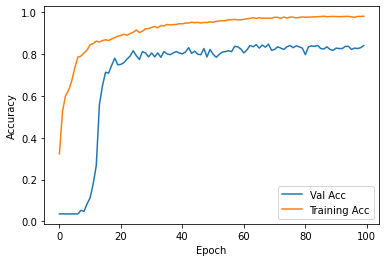

In [82]:
plt.figure()
plt.plot([i for i in range(epochs)], history.history['val_acc'], label='Val Acc')
plt.plot([i for i in range(epochs)], history.history['acc'], label='Training Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])